=============================================================================================================

The purpose of this script is to...
1. Generate code that can be pasted into Surfice, to generate renderings of each RSA contrast
2. Align renderings into figures

Note: This script is automated for the most part, however you will have to manually create an image of the colorbar, 
with a suitable min and max (you can do this in surfice) and place it in the renderings_dir (defined in cell #2) before
running all of the code!


=============================================================================================================

In [1]:
# Widen display
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Step 1: Generate Surfice code

WARNING: By default, Surfice saves bitmaps with transparent backgrounds. This can be annoying when making figures. To change this, open Surfice, navigate to Help > Preferences, and uncheck "Background transparent in bitmaps"

In [2]:
# Import necessary packages
import os.path
import pathlib
import numpy as np
from PIL import Image, ImageDraw, ImageFont

# Define important paths
top_dir = open('../top_dir_win.txt').read().replace('\n', '')
data_dir = os.path.join(top_dir, 'MRIanalyses', 'quickread', 'group_level_output', 'RSA_output')

# Note that output_dir is for figures, renderings_dir is for surfice renderings that are created by surfice (see below),
# and then loaded into this script
output_dir = os.path.join(data_dir, '1_tables_and_figures', 'figures')
renderings_dir = os.path.join(output_dir, 'surfice_renderings')

if not os.path.exists(renderings_dir):
    os.makedirs(renderings_dir)

In [3]:
# Define a function to write out a set of commands that can be pasted into Surfice, given input and output paths
def makesurficecode(input_nii, colbar_lims, output_LH_lat, output_LH_med, output_RH_lat, output_RH_med, output_bi_dors, output_BI_vent):
    
    
    # Import gl
    print('import gl') 
    
    # Reset defaults
    print('gl.resetdefaults()')
    
    
    ##########################################
    ## LH
    ##########################################
    
    # Load left hemi mesh
    print('gl.meshload("BrainMesh_ICBM152.lh.mz3")')
    
    # Set background color to black (use: (255,255,255) for white!)    
    print('gl.backcolor(0,0,0)')
    
    # Load overlay
    print('gl.overlayload("%s")' % input_nii)
    
    # Set overlay colour
    print('gl.overlaycolorname(1, "Red-Yellow")')
    
    # Set colorbar limits
    print('gl.overlayminmax(1,%s)' % colbar_lims)
    
    # Hide colorbar and orientation cube
    print('gl.orientcubevisible(0)')
    print('gl.colorbarvisible(0)')
    
    # Set view to lateral & save image to disk (note that 0 = lateral and 1 = medial for LH only; vice-versa for RH)
    print('gl.viewsagittal(0)')
    print('gl.savebmp("%s")' % output_LH_lat)
          
    # Set view to medial and save to disk
    print('gl.viewsagittal(1)')
    print('gl.savebmp("%s")' % output_LH_med)
    
    print('#######################################################')
    
    ##########################################
    ## RH
    ##########################################
    
    # Load RH mesh
    print('gl.meshload("BrainMesh_ICBM152.rh.mz3")')
    
    # Set background color to black (use: (255,255,255) for white!)    
    print('gl.backcolor(0,0,0)')
    
    # Load overlay
    print('gl.overlayload("%s")' % input_nii)
    
    # Set overlay colour
    print('gl.overlaycolorname(1, "Red-Yellow")')
    
    # Set colorbar limits
    print('gl.overlayminmax(1,%s)' % colbar_lims)
    
    # Set background color (use 0,0,0 for black or 255,255,255 for white)
    
    # Hide colorbar and orientation cube
    print('gl.orientcubevisible(0)')
    print('gl.colorbarvisible(0)')
    
    # Set view to lateral & save image to disk (note that 0 = lateral and 1 = medial for LH only; vice-versa for RH)
    print('gl.viewsagittal(1)')
    print('gl.savebmp("%s")' % output_RH_lat)
          
    # Set view to medial and save to disk
    print('gl.viewsagittal(0)')
    print('gl.savebmp("%s")' % output_RH_med)
    
    print('#######################################################')
    
    ##########################################
    ## Bilateral dorsal view
    ##########################################
    # Load bilateral mesh
    print('gl.meshload("BrainMesh_ICBM152.mz3")')
    
    # Set background color to black (use: (255,255,255) for white!)    
    print('gl.backcolor(0,0,0)')
    
    # Load overlay
    print('gl.overlayload("%s")' % input_nii)
    
    # Set overlay colour
    print('gl.overlaycolorname(1, "Red-Yellow")')
    
    # Set colorbar limits
    print('gl.overlayminmax(1,%s)' % colbar_lims)
    
    # Hide colorbar and orientation cube
    print('gl.orientcubevisible(0)')
    print('gl.colorbarvisible(0)')
    
    # Set axial view to 1 (shows dorsal surface) and save to disk
    print('gl.viewaxial(1)')
    print('gl.savebmp("%s")' % output_bi_dors)
    
    print('#######################################################')
    
    ##########################################
    ## Bilateral ventral view
    ##########################################
    # Load bilateral mesh
    print('gl.meshload("BrainMesh_ICBM152.mz3")')
    
    # Set background color to black (use: (255,255,255) for white!)    
    print('gl.backcolor(0,0,0)')
    
    # Load overlay
    print('gl.overlayload("%s")' % input_nii)
    
    # Set overlay colour
    print('gl.overlaycolorname(1, "Red-Yellow")')
    
    # Set colorbar limits
    print('gl.overlayminmax(1,%s)' % colbar_lims)
    
    # Hide colorbar and orientation cube
    print('gl.orientcubevisible(0)')
    print('gl.colorbarvisible(0)')
    
    # Set axial view to 0 (shows ventral surface) and save to disk
    print('gl.viewaxial(0)')
    print('gl.savebmp("%s")' % output_BI_vent)
    
    print('#######################################################')
          
   
    


### Define the desired contrast here (aloud-silent or silent-aloud)

In [4]:
contrast = 'aloud-silent'

In [6]:
# Implement function for the desired model/contrast combination(s). Note that the default windows path 
# delimiter ('\') causes problems in surfice, so below all instances of '\' are replaced with '/'.

# The output below may be pasted directly into the Surfice scripting window (ctrl + N) and run (ctrl + R)

# Define colourbar limits: 'lower,upper'
colbar_lims = "3,50"
    
# Note that we don't want all possible contrast/model combinations, so define the models for the selected contrast
if contrast == 'aloud-silent':
    models = ['visual', 'phonological', 'articulatory']
elif contrast == 'silent-aloud':
    models = ['orthographic']

# Loop through models, generating code for each 'surfice_renderings'
for model in models:
    makesurficecode(os.path.join(data_dir + '/%s_group_searchlight_output' % (model), 
                                 'bayes_map_%s_%s_thresh_masked_with_minuend_no_small_clusters.nii.gz' % (contrast, model)).replace("\\","/"), 
                    colbar_lims,
                os.path.join(output_dir, 'surfice_renderings', '%s_%s_LH_lateral' % (model, contrast)).replace("\\","/"),
                os.path.join(output_dir, 'surfice_renderings', '%s_%s_LH_medial' % (model, contrast)).replace("\\","/"),
                os.path.join(output_dir, 'surfice_renderings', '%s_%s_RH_lateral' % (model, contrast)).replace("\\","/"),
                os.path.join(output_dir, 'surfice_renderings', '%s_%s_RH_medial' % (model, contrast)).replace("\\","/"),
                os.path.join(output_dir, 'surfice_renderings', '%s_%s_BI_dorsal' % (model, contrast)).replace("\\","/"),
                os.path.join(output_dir, 'surfice_renderings', '%s_%s_BI_ventral' % (model, contrast)).replace("\\","/")
                 )


import gl
gl.resetdefaults()
gl.meshload("BrainMesh_ICBM152.lh.mz3")
gl.backcolor(0,0,0)
gl.overlayload("D:/MRIanalyses/quickread/group_level_output/RSA_output/visual_group_searchlight_output/bayes_map_aloud-silent_visual_thresh_masked_with_minuend_no_small_clusters.nii.gz")
gl.overlaycolorname(1, "Red-Yellow")
gl.overlayminmax(1,3,50)
gl.orientcubevisible(0)
gl.colorbarvisible(0)
gl.viewsagittal(0)
gl.savebmp("D:/MRIanalyses/quickread/group_level_output/RSA_output/1_tables_and_figures/figures/surfice_renderings/visual_aloud-silent_LH_lateral")
gl.viewsagittal(1)
gl.savebmp("D:/MRIanalyses/quickread/group_level_output/RSA_output/1_tables_and_figures/figures/surfice_renderings/visual_aloud-silent_LH_medial")
#######################################################
gl.meshload("BrainMesh_ICBM152.rh.mz3")
gl.backcolor(0,0,0)
gl.overlayload("D:/MRIanalyses/quickread/group_level_output/RSA_output/visual_group_searchlight_output/bayes_map_aloud-silent_visual_thresh_masked_with_minuend_no_smal

### Step 2: Arrange Surfice renderings into figures 
(assuming you have run the above code in surfice!)

------------- User input here -------------

Figure generation is mostly automated, however some user input may be required. The following cell is where we define resizing & cropping ratios that will ultimately determine the size of the larger figure

In [7]:
# Define the ratio for resizing surface renderings  
resize_render_ratio = 0.25

# Define ratios for cropping surface renderings (i.e., the % of the image we will remove)
crop_render_w_ratio = 0.12
crop_render_h_ratio = 0.22

# Define ratio for horizontal position of the LR labels (on bilateral images)
LR_hpos_ratio = 0.45

# Define the ratio for resizing the colorbar
resize_colorbar_ratio = 0.6

# Define fonts for text
model_font = ImageFont.truetype("calibri.ttf", 24)
title_font = ImageFont.truetype("calibri.ttf", 30)
colorbar_font = ImageFont.truetype("calibri.ttf", 20)
LR_font = ImageFont.truetype("calibri.ttf", 100) # left/right labels for bilateral images

------------- User input here -------------

In [8]:
# Loop through models, loading in the 5 rendered surfaces for each and combining into a single image. 
# These images will ultimately be stacked in rows to create the figure, hence they are labelled row_images
row_images = []

for model_n, model in enumerate(models):
    
    # Load in the individual renderings
    LH_lateral = Image.open(os.path.join(output_dir, 'surfice_renderings', '%s_%s_LH_lateral.png') % (model, contrast))
    LH_medial = Image.open(os.path.join(output_dir, 'surfice_renderings', '%s_%s_LH_medial.png') % (model, contrast))
    RH_lateral = Image.open(os.path.join(output_dir, 'surfice_renderings', '%s_%s_RH_lateral.png') % (model, contrast))
    RH_medial = Image.open(os.path.join(output_dir, 'surfice_renderings', '%s_%s_RH_medial.png') % (model, contrast))
    BI_dorsal = Image.open(os.path.join(output_dir, 'surfice_renderings', '%s_%s_BI_dorsal.png') % (model, contrast))    
    BI_ventral = Image.open(os.path.join(output_dir, 'surfice_renderings', '%s_%s_BI_ventral.png') % (model, contrast))  
    
    # Determine width and height (they should all have the same dimensions)
    width, height = LH_lateral.size

    # Crop out most of the whitespace from each image
    w_crop = width * crop_render_w_ratio
    h_crop = height * crop_render_h_ratio
    
    crop_area = (w_crop, h_crop, width-w_crop, height-h_crop)

    LH_lateral = LH_lateral.crop(crop_area)
    LH_medial = LH_medial.crop(crop_area)
    RH_lateral = RH_lateral.crop(crop_area)
    RH_medial = RH_medial.crop(crop_area)
    BI_dorsal = BI_dorsal.crop(crop_area)
    BI_ventral = BI_ventral.crop(crop_area)
    
    # Resize the 5 (cropped) rendered surfaces
        
    # Define new width and height for each image
    new_width = int(LH_lateral.width * resize_render_ratio)
    new_height = int(LH_lateral.height * resize_render_ratio)
    
    # For the fist model only (i.e., the top row of our figure), add left-right labels to the bilateral images
    if model_n == 0:
        
        # We'll define horizontal and vertical positions of the labels relative to the center of the image
        center_h = BI_dorsal.size[0]/2
        center_v = BI_dorsal.size[1]/2
        
        h_shift = BI_dorsal.size[0] * LR_hpos_ratio

        ImageDraw.Draw(BI_dorsal).text(text='L', anchor = 'lm', xy = (center_h-h_shift, center_v), font=LR_font, fill='white')
        ImageDraw.Draw(BI_dorsal).text(text='R', anchor = 'rm', xy = (center_h+h_shift, center_v), font=LR_font, fill='white')
        
        ImageDraw.Draw(BI_ventral).text(text='R', anchor = 'lm', xy = (center_h-h_shift, center_v), font=LR_font, fill='white')
        ImageDraw.Draw(BI_ventral).text(text='L', anchor = 'rm', xy = (center_h+h_shift, center_v), font=LR_font, fill='white')
        
    
    # Resize each rendering and arrange into a image containing 1 row with 5 panels
    row_im = Image.fromarray(np.hstack([i.resize((new_width, new_height)) for i in [LH_lateral, RH_lateral, LH_medial, RH_medial, BI_dorsal, BI_ventral]]))
    
    # Insert a title at the top left of the image
    ImageDraw.Draw(row_im).text(text=model.title(), anchor = 'ls', xy = (10, 15), font=model_font, fill='white')
    
    # Append this row image to our list of models for this contrast
    row_images.append(row_im)



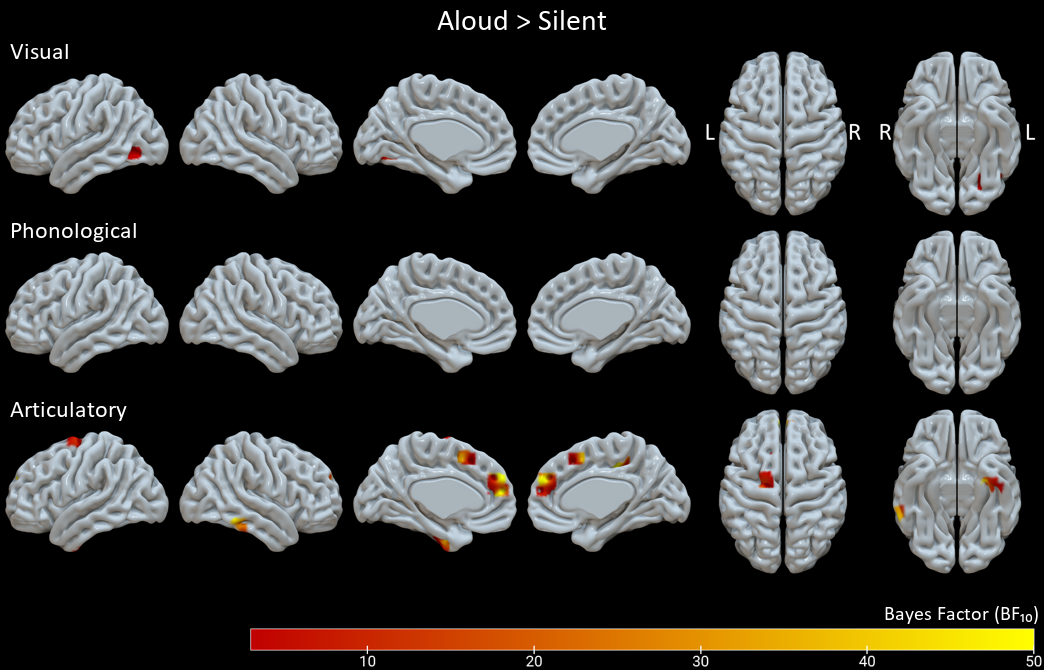

In [10]:
# Concatenate our row images vertically. The way I've implemented this is to create a blank background, 
# and then paste each row image onto it. First, define some important measurements...

# Define number of row images for this contrast
n_images = len(row_images)

# Define the width and height of each row image
each_row_width = row_images[0].width
each_row_height = row_images[0].height

# Define the total height of all rows
total_height = each_row_height * n_images

# Load in the image of the colorbar, resize, and determine new width and height
colorbar = Image.open(os.path.join(output_dir, 'surfice_renderings', 'colorbar_black.png'))
colorbar = colorbar.resize((int(colorbar.width * resize_colorbar_ratio), int(colorbar.height * resize_colorbar_ratio)))
colorbar_width, colorbar_height = colorbar.size

# Create a blank background with w = each_row_width and h = total_height + (each_row_height * 0.4).
# This has the effect of leaving enough space for all row images, plus the colorbar
fig = Image.new('RGBA', (each_row_width, total_height + int(each_row_height * 0.5)), color='black')

# Below we will loop through the row_images, appending each to the background
# First, define a vertical position that we will update on each iteration of the loop
v_pos = 0

# Loop through row images
for i in list(range(0,n_images)):
    fig.paste(row_images[i], (0, v_pos))
    v_pos = v_pos + each_row_height 

# Append the colorbar to the bottom of the image. To position at the 
fig.paste(colorbar, (fig.width - colorbar_width, fig.height - colorbar_height))

# Add a label above the colorbar. Set the vertical position as [(figure height - colorbar height) - a small gap] and horizontal as [fig_width - a small gap]
colorbar_gap = 5
colorbar_label = 'Bayes Factor (' u'BF\u2081\u2080)'
ImageDraw.Draw(fig).text(text=colorbar_label, anchor = 'rs', xy = (fig.width - colorbar_gap, (fig.height - colorbar_height) - colorbar_gap), font=colorbar_font, fill='white')

# Finally, add a title to the top of the figure. We'll do this by creating a new, blank row (25% the height of a regular row), 
# joining it to the top of the Figure, and then adding the title text.

# Create space for title
title_space = Image.new('RGBA', ((fig.width, int(each_row_height * 0.25))), color='black')

# Add it to top of figure
fig = Image.fromarray(np.vstack([title_space, fig]))

# Add text
title_text = contrast.replace('-', ' > ').title()

ImageDraw.Draw(fig).text(text=title_text, anchor = 'mm', xy = (each_row_width * 0.5, title_space.height * 0.5), font=title_font, fill='white')
fig

## Scale image, if desired

In [ ]:
fig = fig.resize((fig.width * 5, fig.height * 5), Image.ANTIALIAS)

## Save to disk
You must define the file name!

In [ ]:
if contrast == 'aloud-silent':
    fname = 'Figure 3 aloud-silent.png'
elif contrast == 'silent-aloud':
    fname = 'Figure 4 silent-aloud.png'

fig.save(os.path.join(output_dir, fname), dpi = (600, 600))